## Descriptive Analytics for Numerical Columns

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df=pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
df.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [5]:
df.shape

(450, 13)

In [6]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [7]:
df.rename(columns={'Discount Rate (%)':'Discount Rate'}, inplace=True)

In [8]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate        float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [9]:
#Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64','float']).columns
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [10]:
#Calculating mean, median, mode, and standard deviation
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0] 
std_dev_values = df[numerical_columns].std()

In [11]:
#mean
print(mean_values)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate           15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [12]:
#median
print(median_values)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate          16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64


In [13]:
#Mode
print(mode_values)

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate            5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64


In [14]:
#standard deviation 
print(std_dev_values)

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate            4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [15]:
# Using describe() to understand the statistics of a specific columns
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate,Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


## Data Visualization

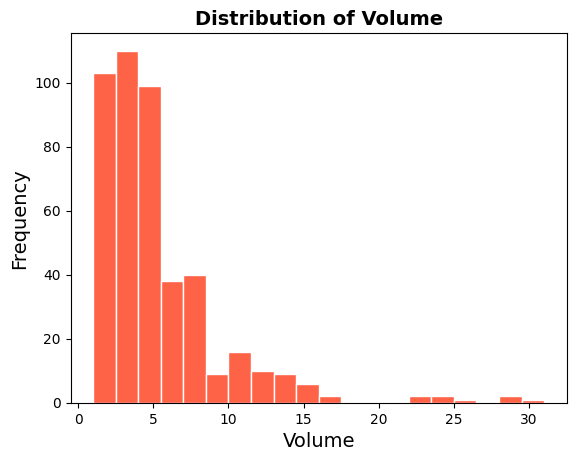

In [16]:
plt.title('Distribution of Volume', fontweight='bold', fontsize=14)
plt.xlabel('Volume',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.hist(df['Volume'], edgecolor='white', color='tomato', bins=20)
plt.show()

Analysis: The histogram of Volume shows that the majority of value shows small number of units sold, with a right-skewed distribution. There are a few transactions with a significantly higher volume compared to the rest, indicating the presence of outliers.

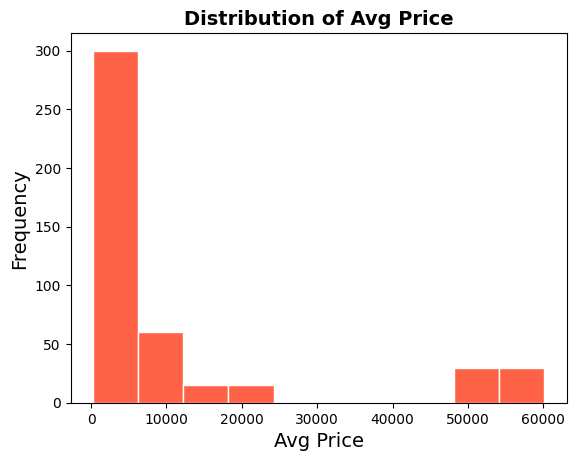

In [17]:
plt.title('Distribution of Avg Price', fontweight='bold', fontsize=14)
plt.xlabel('Avg Price',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.hist(df['Avg Price'], edgecolor='white',color='tomato', bins=10)
plt.show()

Analysis: The histogram of Avg Price shows that the majority of the products, are sold at lower price with a right-skewed distribution. There are also few products which are sold at higher price compared to the rest.

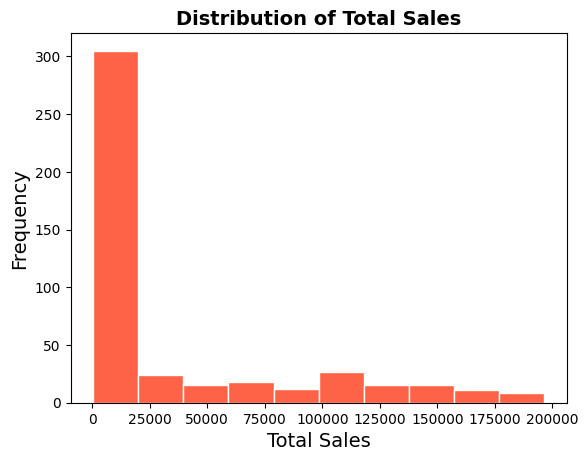

In [18]:
plt.title('Distribution of Total Sales', fontweight='bold', fontsize=14)
plt.xlabel('Total Sales',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.hist(df['Total Sales Value'], edgecolor='white', color='tomato', bins=10)
plt.show()

Analysis: The histogram of Total sales Value shows that most of the sales value, are very low with a right-skewed distribution. There are also few sales value which are comparatively higher compared to the rest.

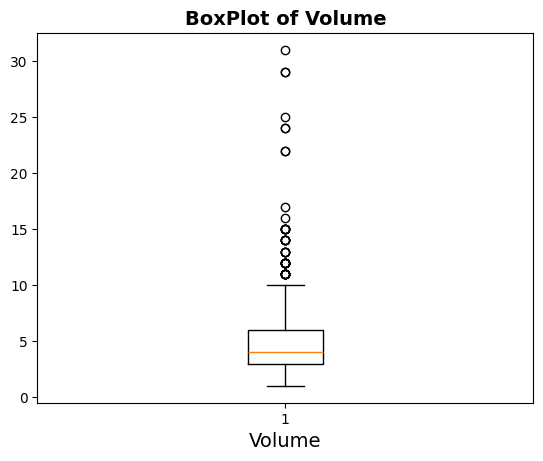

In [19]:
plt.title('BoxPlot of Volume',fontweight='bold', fontsize=14)
plt.boxplot(df['Volume'])
plt.xlabel('Volume',fontsize=14)
plt.show()

Analysis: The boxplot of Volume reveals the presence of outliers, with the majority of transactions having a smaller volume of units sold. The median volume is lower, indicating that half of the transactions involve selling fewer units.

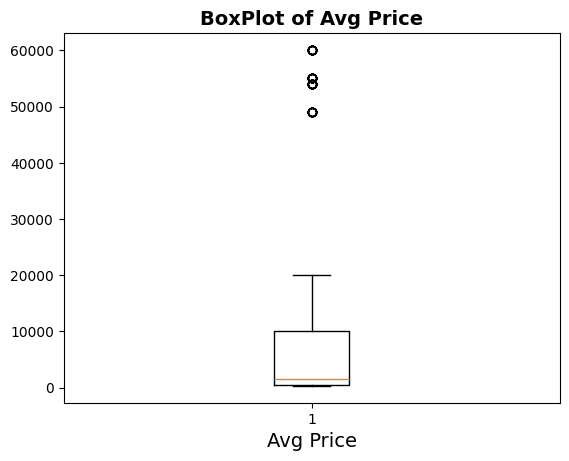

In [20]:
plt.title('BoxPlot of Avg Price',fontweight='bold', fontsize=14)
plt.boxplot(df['Avg Price'])
plt.xlabel('Avg Price',fontsize=14)
plt.show()

Analysis: The boxplot of Avg Price shows the distribution of product prices, with a few outliers on the higher end. Most products are sold at lower prices, with the median value falling in the lower range.

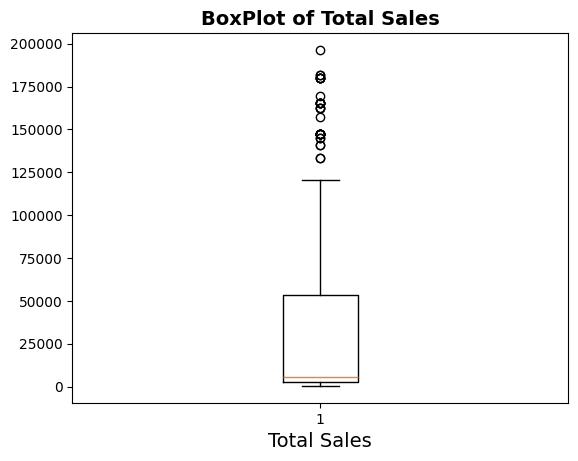

In [21]:
plt.title('BoxPlot of Total Sales',fontweight='bold', fontsize=14)
plt.boxplot(df['Total Sales Value'])
plt.xlabel('Total Sales',fontsize=14)
plt.show()

Analysis: The boxplot of Total Sales Value illustrates the spread of sales values, with some transactions having significantly higher values compared to others. There are a few outliers representing high sales values.

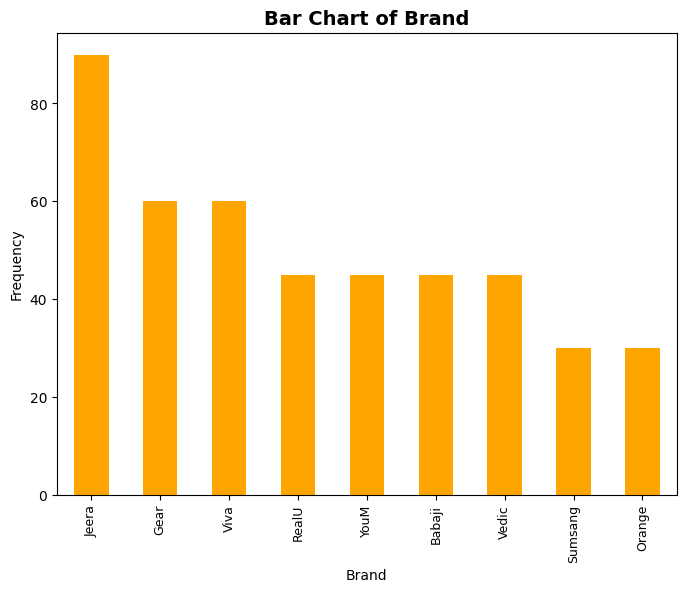

In [22]:
plt.figure(figsize=(8, 6))
df['Brand'].value_counts().plot(kind='bar', color='orange')
plt.title('Bar Chart of Brand',fontweight='bold', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(fontsize=9)
plt.show()

Analysis: The bar chart of Brand shows the frequency of transactions for each brand. It reveals that Jeera is the most popular brand, followed by other brands. 

### Standardization of Numerical Variables

Explanation of Standardization (Z-score Normalization)

Standardization, also known as Z-score normalization, is a technique used to transform numerical variables to have a mean of 0 and a standard deviation of 1. This process involves subtracting the mean (mu) from each value and then dividing by the standard deviation (sigma). This standardizes the distribution of the data, making it easier to compare variables with different scales and improving the performance of analytical models.

In [23]:
# Displaying summary statistics before standardization
print("Summary Statistics Before Standardization:")
print(df.describe())

Summary Statistics Before Standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate  \
count  450.000000    450.000000         450.000000     450.000000   
mean     5.066667  10453.433333       33812.835556      15.155242   
std      4.231602  18079.904840       50535.074173       4.220602   
min      1.000000    290.000000         400.000000       5.007822   
25%      3.000000    465.000000        2700.000000      13.965063   
50%      4.000000   1450.000000        5700.000000      16.577766   
75%      6.000000  10100.000000       53200.000000      18.114718   
max     31.000000  60100.000000      196400.000000      19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  

# Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Selecting numerical columns for standardization
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate', 'Discount Amount', 'Net Sales Value']
numerical_columns

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate',
 'Discount Amount',
 'Net Sales Value']

In [26]:
scaler = StandardScaler()
scaler 

StandardScaler()

In [27]:
sales_data_standardized = df.copy()  # Creating a copy of the original dataset
sales_data_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])
sales_data_standardized[numerical_columns] 

,Volume,Avg Price,Total Sales Value,Discount Rate,Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [28]:
# Displaying summary statistics after standardization
print("\nSummary Statistics After Standardization:")
print(sales_data_standardized.describe())


Summary Statistics After Standardization:
             Volume     Avg Price  Total Sales Value  Discount Rate  \
count  4.500000e+02  4.500000e+02       4.500000e+02   4.500000e+02   
mean   6.118562e-17  3.157968e-17       1.578984e-17  -3.552714e-17   
std    1.001113e+00  1.001113e+00       1.001113e+00   1.001113e+00   
min   -9.620925e-01 -5.627654e-01      -6.619170e-01  -2.406935e+00   
25%   -4.889322e-01 -5.530754e-01      -6.163534e-01  -2.823066e-01   
50%   -2.523521e-01 -4.985344e-01      -5.569226e-01   3.374180e-01   
75%    2.208081e-01 -1.957016e-02       3.840648e-01   7.019781e-01   
max    6.135311e+00  2.749009e+00       3.220894e+00   1.147360e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -5.526444e-17     1.973730e-17  
std       1.001113e+00     1.001113e+00  
min      -7.275032e-01    -6.508581e-01  
25%      -6.406462e-01    -6.103625e-01  
50%      -5.233349e-01    -5.569025e-01  
75%       4.373018e-01 

# Conversion of Categorical Data into Dummy Variables

Need for Converting Categorical Data into Dummy Variables (One-Hot Encoding)

In many machine learning algorithms, categorical variables cannot be directly used as inputs. One-hot encoding is a technique used to convert categorical variables into a format that can be provided to machine learning algorithms. It creates binary (0 or 1) columns for each category in the categorical variable. This ensures that the categorical data is represented in a numerical format, allowing machine learning models to interpret and process it effectively.

### Before One-Hot Encoding

In [29]:
# Displaying a portion of the dataset before one-hot encoding
print("Dataset Before One-Hot Encoding:")
print(df.head())

Dataset Before One-Hot Encoding:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate  Discount Amount  \
0      12100             181500      11.654820     21153.498820   
1      10100             101000      11.560498     11676.102961   
2      16100             112700       9.456886     10657.910157   
3      20100             120600       6.935385      8364.074702   
4       8100              24300      17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

### One-Hot Encoding

In [30]:
# Performing one-hot encoding on categorical columns
sales_data_encoded = pd.get_dummies(df)

In [31]:
sales_data_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate,Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Displaying a portion of the transformed dataset after one-hot encoding
print("\nDataset After One-Hot Encoding:")
print(sales_data_encoded.head())


Dataset After One-Hot Encoding:
   Volume  Avg Price  Total Sales Value  Discount Rate  Discount Amount  \
0      15      12100             181500      11.654820     21153.498820   
1      10      10100             101000      11.560498     11676.102961   
2       7      16100             112700       9.456886     10657.910157   
3       6      20100             120600       6.935385      8364.074702   
4       3       8100              24300      17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            F

## Conclusion

### Key Findings from Descriptive Analytics and Data Visualizations

Numerical Columns:

The mean Volume of sales is 5.07 units, with a median of 4 units, indicating a slightly right-skewed distribution.
Total Sales Value has a mean of 33812.84 and a median of 5700, suggesting a right-skewed distribution with some transactions having considerably higher sales values.
Discount Amount and Net Sales Value exhibit similar patterns, with a wide range of values and a right-skewed distribution.

Data Visualization:

Histograms and boxplots revealed the distribution and presence of outliers in numerical variables.
Bar charts for categorical columns illustrated the frequency of transactions in each category, providing insights into the distribution of sales across different cities and brands.

## Reflection on the Importance of Data Preprocessing Steps

Standardization:

Standardizing numerical variables ensures that they are on the same scale, improving the performance of analytical models.
By scaling the data to have a mean of 0 and a standard deviation of 1, standardization facilitates accurate pattern recognition in the data.

One-Hot Encoding:

One-hot encoding transforms categorical variables into a numerical format suitable for machine learning algorithms.
This process enables models to interpret categorical data effectively and make accurate predictions based on the transformed dataset.

In conclusion, data preprocessing steps like standardization and one-hot encoding are essential for ensuring the quality and usability of the dataset in data analysis and machine learning tasks. These steps enable us to extract meaningful insights, build accurate models, and make informed decisions based on the data.